In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"d:\iNueron\Datasets\playground-series-s3e8\train.csv")

In [4]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
data.shape

(193573, 11)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB
None


In [7]:
print(data.describe())

                  id          carat          depth          table  \
count  193573.000000  193573.000000  193573.000000  193573.000000   
mean    96786.000000       0.790688      61.820574      57.227675   
std     55879.856166       0.462688       1.081704       1.918844   
min         0.000000       0.200000      52.100000      49.000000   
25%     48393.000000       0.400000      61.300000      56.000000   
50%     96786.000000       0.700000      61.900000      57.000000   
75%    145179.000000       1.030000      62.400000      58.000000   
max    193572.000000       3.500000      71.600000      79.000000   

                   x              y              z          price  
count  193573.000000  193573.000000  193573.000000  193573.000000  
mean        5.715312       5.720094       3.534246    3969.155414  
std         1.109422       1.102333       0.688922    4034.374138  
min         0.000000       0.000000       0.000000     326.000000  
25%         4.700000       4.710000   

In [8]:
print(data.isnull().sum())

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [9]:
data.drop(columns="id",axis=1,inplace=True)

In [10]:
data.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
cat_cols=data.columns[data.dtypes=="object"]
num_cols=data.columns[data.dtypes!="object"]
print(cat_cols)
print(num_cols)

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [13]:
for col in cat_cols:
    print(data[col].value_counts())
    print(f"Here is the total count : {len(data[col].value_counts())}")
    print("================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
Here is the total count : 5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
Here is the total count : 7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
Here is the total count : 8


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

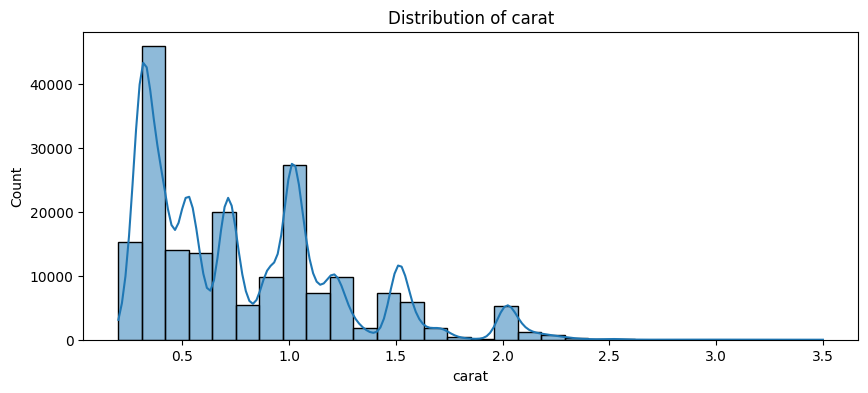

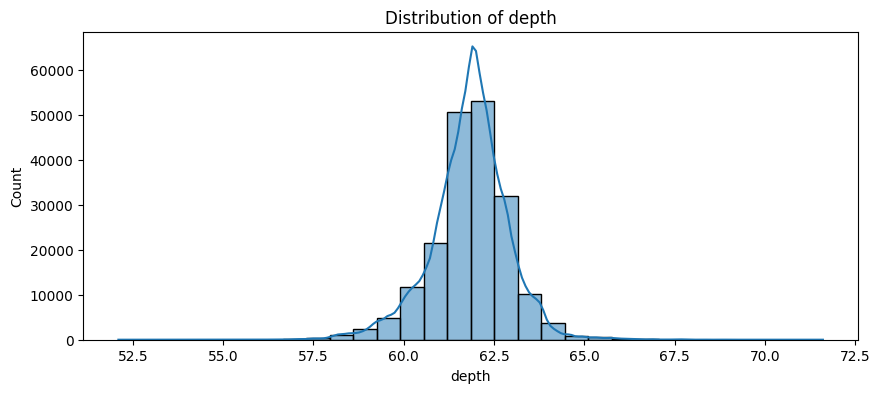

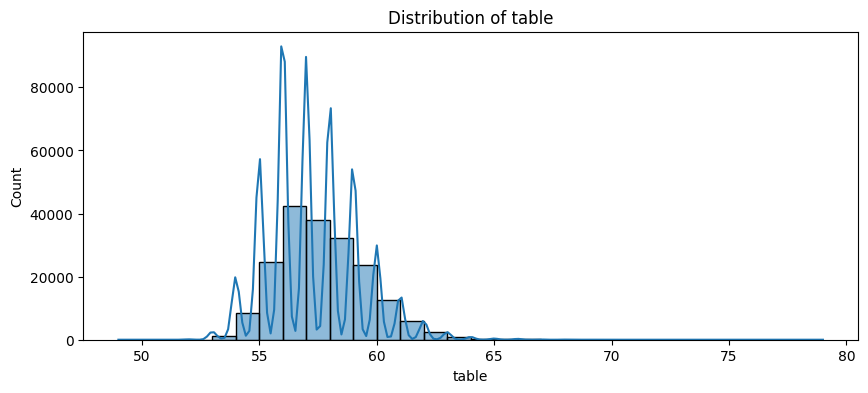

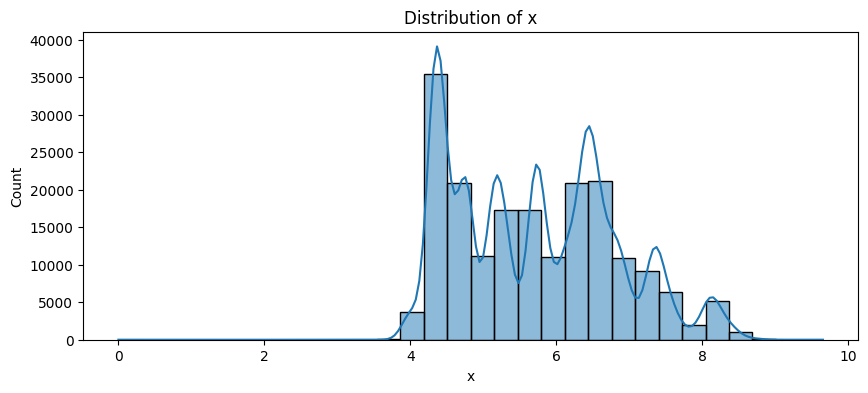

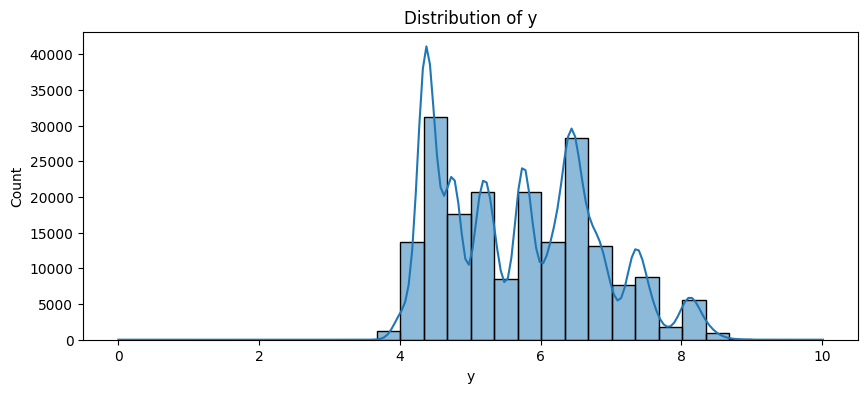

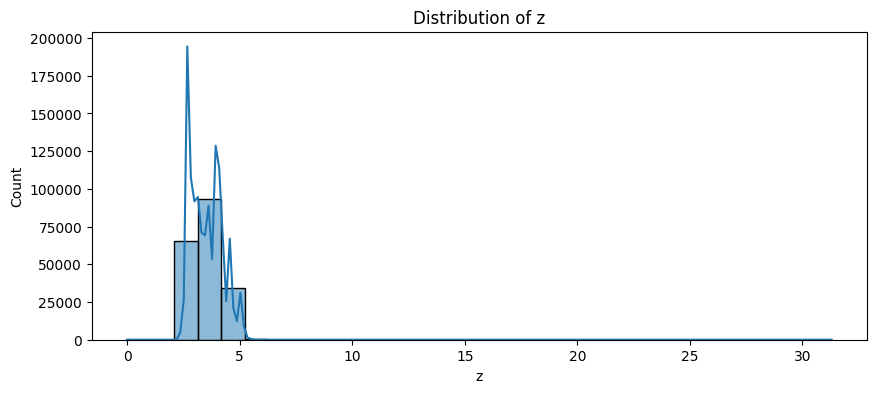

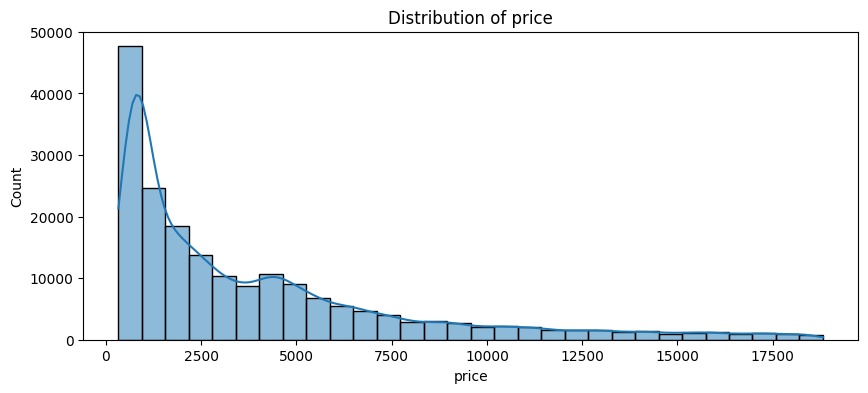

In [15]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

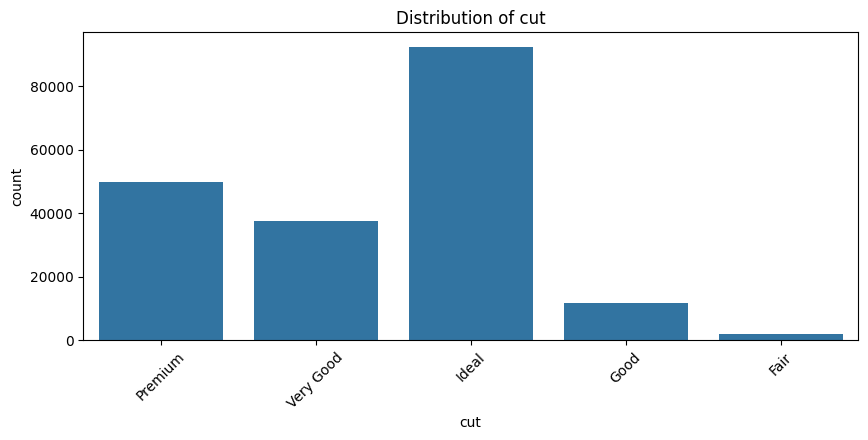

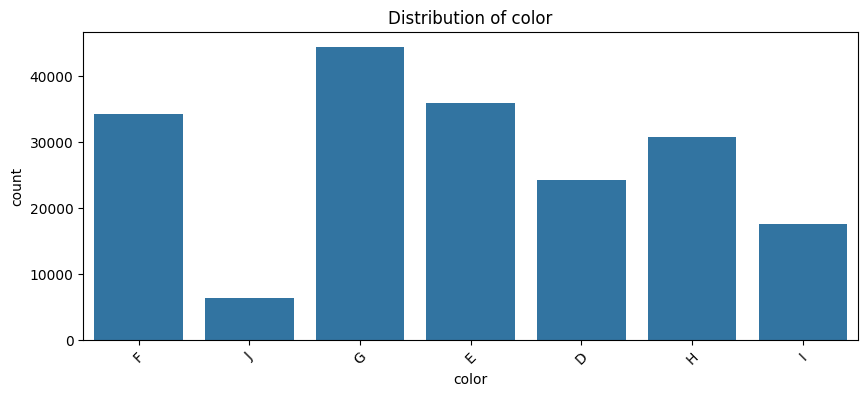

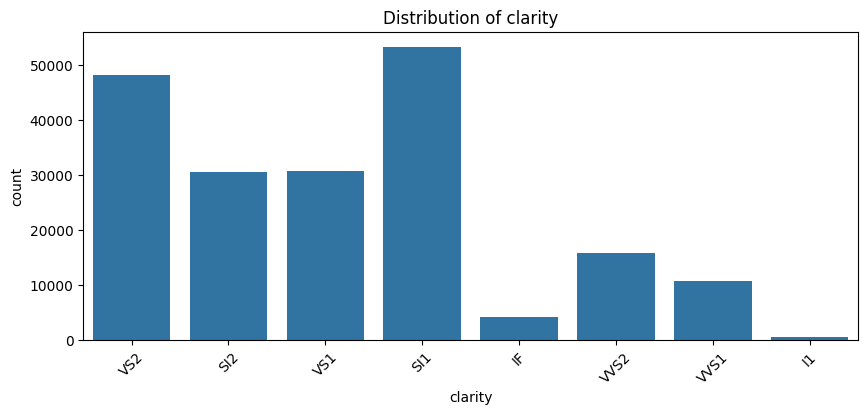

In [16]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

<Axes: >

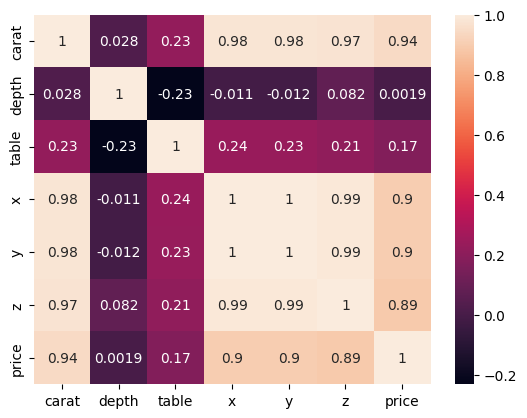

In [17]:
sns.heatmap(data[num_cols].corr(),annot=True)

In [18]:
data[cat_cols]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [19]:
cut_mapping = {
    'Ideal': 5,
    'Premium': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1
}


In [20]:
color_mapping = {
    'D': 7,  # Best color
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1   # Worst color
}


In [21]:
clarity_mapping = {
    'FL': 8,  # Flawless
    'IF': 7,  # Internally Flawless
    'VVS1': 6,  # Very, Very Slightly Included 1
    'VVS2': 5,  # Very, Very Slightly Included 2
    'VS1': 4,  # Very Slightly Included 1
    'VS2': 3,  # Very Slightly Included 2
    'SI1': 2,  # Slightly Included 1
    'SI2': 1   # Slightly Included 2
}


In [22]:
data["cut"]=data["cut"].map(cut_mapping)
data["color"]=data["color"].map(color_mapping)
data["clarity"]=data["clarity"].map(clarity_mapping)

In [23]:
data.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,3.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,1.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,4.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,4.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,3.0,62.6,59.0,7.65,7.61,4.77,14453


Model building

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop('price', axis=1)  
y = data['price'] 

In [26]:
print(X)
print(y)

        carat  cut  color  clarity  depth  table     x     y     z
0        1.52    4      5      3.0   62.2   58.0  7.27  7.33  4.55
1        2.03    3      1      1.0   62.0   58.0  8.06  8.12  5.05
2        0.70    5      4      4.0   61.2   57.0  5.69  5.73  3.50
3        0.32    5      4      4.0   61.6   56.0  4.38  4.41  2.71
4        1.70    4      4      3.0   62.6   59.0  7.65  7.61  4.77
...       ...  ...    ...      ...    ...    ...   ...   ...   ...
193568   0.31    5      7      5.0   61.1   56.0  4.35  4.39  2.67
193569   0.70    4      4      5.0   60.3   58.0  5.75  5.77  3.47
193570   0.73    3      5      2.0   63.1   57.0  5.72  5.75  3.62
193571   0.34    3      7      2.0   62.9   55.0  4.45  4.49  2.81
193572   0.71    2      6      1.0   60.8   64.0  5.73  5.71  3.48

[193573 rows x 9 columns]
0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572   

In [27]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,3.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,1.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,4.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,4.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,3.0,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,7,5.0,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,5.0,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,5,2.0,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,7,2.0,62.9,55.0,4.45,4.49,2.81,681


In [28]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,3.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,1.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,4.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,4.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,3.0,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,7,5.0,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,5.0,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,5,2.0,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,7,2.0,62.9,55.0,4.45,4.49,2.81,681


We are going to do preprocessing once more and this time we use some pipeline for that 

Lets load the data once again 


In [57]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [66]:
data=pd.read_csv(r"d:\iNueron\Datasets\playground-series-s3e8\train.csv")

In [67]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


split the data to X & y

In [68]:
X=data.drop(columns=["id","price"])
y=data["price"]

In [69]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [70]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [71]:
# now seperate categorical and numerical columns from the X 

cat_cols=X.select_dtypes(include="object").columns
num_cols=X.select_dtypes(exclude="object").columns

In [72]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [73]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

Now we are going to compose the necessary preprocesing steps for this data in pipeline

In [81]:
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
          ]  
)

In [82]:
cut_categories=["Fair","Good","Very Good","Premium","Ideal"]
color_categories=["D","E","F","G","H","I","J"]
clarity_categories=["I1", "IF", "VVS1", "VVS2", "VS1", "VS2", "SI2", "SI1"]

In [83]:
cat_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
)

Now we perform both pipeline in a object called preprocesser by using columntransformer

In [84]:
preprocesser=ColumnTransformer(
    [
    ("num_pipeline",num_pipeline,num_cols),
    ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)

The preprocessing pipeline is ready , now transform the data to the pipeline but before that we have to split the data into train and test

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [87]:
preprocesser.fit_transform(X_train)


array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         1.        ,  3.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         4.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         4.        ,  5.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  5.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  2.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  6.        ]])

In [88]:
preprocesser.transform(X_test)

array([[-0.62907669,  0.25822979, -0.12063049, ...,  4.        ,
         0.        ,  7.        ],
       [ 2.60537405, -2.14801405, -0.12063049, ...,  2.        ,
         3.        ,  6.        ],
       [-1.1250258 , -1.22253565,  0.92190185, ...,  3.        ,
         1.        ,  2.        ],
       ...,
       [-0.82314374, -0.01941373, -0.64189666, ...,  4.        ,
         3.        ,  2.        ],
       [ 0.90189666, -0.66724861,  1.44316802, ...,  3.        ,
         5.        ,  7.        ],
       [ 0.47063656,  0.90606467, -0.64189666, ...,  2.        ,
         1.        ,  5.        ]])

In [89]:
preprocesser.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [90]:
#make it a dataframe

X_train=pd.DataFrame(preprocesser.fit_transform(X_train),columns=preprocesser.get_feature_names_out())
X_test=pd.DataFrame(preprocesser.transform(X_test),columns=preprocesser.get_feature_names_out())

In [91]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,1.0,3.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,4.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,4.0,5.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,2.0,2.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,2.0,1.0,7.0
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,2.0,2.0,7.0
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,3.0,3.0,5.0
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,2.0,3.0,2.0


In [92]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.629077,0.258230,-0.120630,-0.600482,-0.581521,-0.572248,4.0,0.0,7.0
1,2.605374,-2.148014,-0.120630,2.126042,2.198832,1.959219,2.0,3.0,6.0
2,-1.125026,-1.222536,0.921902,-1.374347,-1.414721,-1.469110,3.0,1.0,2.0
3,-1.017211,-0.574701,0.921902,-1.158385,-1.161138,-1.194265,3.0,5.0,2.0
4,0.858771,0.628421,-0.641897,0.947248,0.985258,1.004495,4.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...
58067,0.255007,0.535873,0.921902,0.416340,0.369414,0.425874,2.0,5.0,6.0
58068,-0.607514,0.535873,-0.641897,-0.528495,-0.554351,-0.499920,4.0,0.0,5.0
58069,-0.823144,-0.019414,-0.641897,-0.834441,-0.862273,-0.847093,4.0,3.0,2.0
58070,0.901897,-0.667249,1.443168,1.046230,0.967145,0.932167,3.0,5.0,7.0
